<a href="https://colab.research.google.com/github/mastermindankur/credit-card-landscape-india/blob/main/SBI_CARDS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [ ]:
url = 'https://www.rbi.org.in/Scripts/ATMView.aspx?atmid={}'  # Replace with the actual URL

In [ ]:
# creating multiple lists which will be used to create the final data frame
dates_list=[]
#SBI
total_no_of_sbi_cards=[]
total_no_of_sbi_transactions_pos=[]
total_no_of_sbi_transactions_online=[]
total_no_of_sbi_transactions_atm=[]
total_value_of_sbi_transactions_pos=[]
total_value_of_sbi_transactions_online=[]
total_value_of_sbi_transactions_atm=[]
#HDFC
total_no_of_hdfc_cards=[]
total_no_of_hdfc_transactions_pos=[]
total_no_of_hdfc_transactions_online=[]
total_no_of_hdfc_transactions_atm=[]
total_value_of_hdfc_transactions_pos=[]
total_value_of_hdfc_transactions_online=[]
total_value_of_hdfc_transactions_atm=[]
#ICICI
total_no_of_icici_cards=[]
total_no_of_icici_transactions_pos=[]
total_no_of_icici_transactions_online=[]
total_no_of_icici_transactions_atm=[]
total_value_of_icici_transactions_pos=[]
total_value_of_icici_transactions_online=[]
total_value_of_icici_transactions_atm=[]
#total
total_no_of_cards=[]

In [ ]:
def search_no_of_cards_by_bank_name(df,bank_name,no_of_cards,pos_tx_count,online_tx_count,atm_tx_count,pos_tx_value,online_tx_value,atm_tx_value):
  # Search by column index
  column_index = 1  # Index of the 'bank name' column
  #search_value = "BANK OF INDIA"  # Value to search for
  result = df[df.iloc[:, column_index] == bank_name]
  no_of_cards.append(result.iloc[0,8])
  pos_tx_count.append(result.iloc[0,10])
  online_tx_count.append(result.iloc[0,12])
  atm_tx_count.append(result.iloc[0,16])
  pos_tx_value.append(result.iloc[0,11])
  online_tx_value.append(result.iloc[0,13])
  atm_tx_value.append(result.iloc[0,17])
  #########

In [ ]:
def read_page_and_add_to_list(url):
  response = requests.get(url)
  dataframes = pd.read_html(response.content)
  df = dataframes[1]  # Replace 0 with the appropriate index if needed
  #######
  # THIS will find the month and year of the report
  text=df.iloc[0,0]
  # Extract substring after a specific string using str.extract()
  substring = "month of"
  extracted = text.lower().split(substring)[-1].strip()
  extracted1=extracted.replace("-", " ")
  datetime_object = datetime.strptime(extracted1, "%B %Y")
  dates_list.append(datetime_object)
  #########
  search_no_of_cards_by_bank_name(df,'STATE BANK OF INDIA',total_no_of_sbi_cards,total_no_of_sbi_transactions_pos,total_no_of_sbi_transactions_online,total_no_of_sbi_transactions_atm,total_value_of_sbi_transactions_pos,total_value_of_sbi_transactions_online,total_value_of_sbi_transactions_atm)
  search_no_of_cards_by_bank_name(df,'HDFC BANK LTD',total_no_of_hdfc_cards,total_no_of_hdfc_transactions_pos,total_no_of_hdfc_transactions_online,total_no_of_hdfc_transactions_atm,total_value_of_hdfc_transactions_pos,total_value_of_hdfc_transactions_online,total_value_of_hdfc_transactions_atm)
  search_no_of_cards_by_bank_name(df,'ICICI BANK LTD',total_no_of_icici_cards,total_no_of_icici_transactions_pos,total_no_of_icici_transactions_online,total_no_of_icici_transactions_atm,total_value_of_icici_transactions_pos,total_value_of_icici_transactions_online,total_value_of_icici_transactions_atm)


  # Search by column index
  column_index = 0  # Index of the 'total' column
  search_value = "Total"  # Value to search for
  result = df[df.iloc[:, column_index] == search_value]
  ## if result is empty total can be column index 1, try searching in index=1
  if result.empty:
    column_index = 1
    result = df[df.iloc[:, column_index] == search_value]
  #print(result)
  total_no_of_cards.append(result.iloc[0,8])

  return df

In [ ]:
#result=read_page_and_add_to_list('https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=147')

In [ ]:
for num in range(134, 148):
  URL=url.format(num)
  print(URL)
  read_page_and_add_to_list(URL)

https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=134
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=135
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=136
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=137
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=138
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=139
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=140
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=141
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=142
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=143
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=144
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=145
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=146
https://www.rbi.org.in/Scripts/ATMView.aspx?atmid=147


In [ ]:
all_cards = pd.DataFrame({'dates': dates_list,
                          'total_no_of_sbi_cards': total_no_of_sbi_cards,
                          'total_no_of_hdfc_cards': total_no_of_hdfc_cards,
                          'total_no_of_icici_cards': total_no_of_icici_cards,
                          'total_no_of_cards': total_no_of_cards,
                          'total_no_of_sbi_transactions_pos':total_no_of_sbi_transactions_pos,
                          'total_no_of_sbi_transactions_online':total_no_of_sbi_transactions_online,
                          'total_no_of_sbi_transactions_atm':total_no_of_sbi_transactions_atm,
                          'total_value_of_sbi_transactions_pos':total_value_of_sbi_transactions_pos,
                          'total_value_of_sbi_transactions_online':total_value_of_sbi_transactions_online,
                          'total_value_of_sbi_transactions_atm':total_value_of_sbi_transactions_atm,
                          'total_no_of_hdfc_transactions_pos':total_no_of_hdfc_transactions_pos,
                          'total_no_of_hdfc_transactions_online':total_no_of_hdfc_transactions_online,
                          'total_no_of_hdfc_transactions_atm':total_no_of_hdfc_transactions_atm,
                          'total_value_of_hdfc_transactions_pos':total_value_of_hdfc_transactions_pos,
                          'total_value_of_hdfc_transactions_online':total_value_of_hdfc_transactions_online,
                          'total_value_of_hdfc_transactions_atm':total_value_of_hdfc_transactions_atm,
                          'total_no_of_icici_transactions_pos':total_no_of_icici_transactions_pos,
                          'total_no_of_icici_transactions_online':total_no_of_icici_transactions_online,
                          'total_no_of_icici_transactions_atm':total_no_of_icici_transactions_atm,
                          'total_value_of_icici_transactions_pos':total_value_of_icici_transactions_pos,
                          'total_value_of_icici_transactions_online':total_value_of_icici_transactions_online,
                          'total_value_of_icici_transactions_atm':total_value_of_icici_transactions_atm})

In [ ]:
# settung date time as index
all_cards.set_index('dates', inplace=True)
# converting all columns data types to floating point values
s = all_cards.select_dtypes(include='object').columns
all_cards[s] = all_cards[s].astype("float")

In [ ]:
all_cards.dtypes

total_no_of_sbi_cards                       float64
total_no_of_hdfc_cards                      float64
total_no_of_icici_cards                     float64
total_no_of_cards                           float64
total_no_of_sbi_transactions_pos            float64
total_no_of_sbi_transactions_online         float64
total_no_of_sbi_transactions_atm            float64
total_value_of_sbi_transactions_pos         float64
total_value_of_sbi_transactions_online      float64
total_value_of_sbi_transactions_atm         float64
total_no_of_hdfc_transactions_pos           float64
total_no_of_hdfc_transactions_online        float64
total_no_of_hdfc_transactions_atm           float64
total_value_of_hdfc_transactions_pos        float64
total_value_of_hdfc_transactions_online     float64
total_value_of_hdfc_transactions_atm        float64
total_no_of_icici_transactions_pos          float64
total_no_of_icici_transactions_online       float64
total_no_of_icici_transactions_atm          float64
total_value_

In [ ]:
# convert to lakhs
all_cards['total_no_of_sbi_cards'] = all_cards['total_no_of_sbi_cards']
all_cards['total_no_of_hdfc_cards'] = all_cards['total_no_of_hdfc_cards']
all_cards['total_no_of_icici_cards'] = all_cards['total_no_of_icici_cards']
all_cards['total_no_of_cards'] = all_cards['total_no_of_cards']

In [ ]:
# computing market share of cards
all_cards['market_share_sbi']=all_cards['total_no_of_sbi_cards']/all_cards['total_no_of_cards']*100
all_cards['market_share_hdfc']=all_cards['total_no_of_hdfc_cards']/all_cards['total_no_of_cards']*100
all_cards['market_share_icici']=all_cards['total_no_of_icici_cards']/all_cards['total_no_of_cards']*100

In [ ]:
# computing no of transaction per card
all_cards['no_of_tx_per_card_sbi']=(all_cards['total_no_of_sbi_transactions_pos']+all_cards['total_no_of_sbi_transactions_online'])/all_cards['total_no_of_sbi_cards']
all_cards['no_of_tx_per_card_hdfc']=(all_cards['total_no_of_hdfc_transactions_pos']+all_cards['total_no_of_hdfc_transactions_online'])/all_cards['total_no_of_hdfc_cards']
all_cards['no_of_tx_per_card_icici']=(all_cards['total_no_of_icici_transactions_pos']+all_cards['total_no_of_icici_transactions_online'])/all_cards['total_no_of_icici_cards']


In [ ]:
# computing value in Rupees per transaction
all_cards['value_per_tx_sbi']=1000*(all_cards['total_value_of_sbi_transactions_pos']+all_cards['total_value_of_sbi_transactions_online']+all_cards['total_value_of_sbi_transactions_atm'])/(all_cards['total_no_of_sbi_transactions_pos']+all_cards['total_no_of_sbi_transactions_online']+all_cards['total_no_of_sbi_transactions_atm'])
all_cards['value_per_tx_hdfc']=1000*(all_cards['total_value_of_hdfc_transactions_pos']+all_cards['total_value_of_hdfc_transactions_online']+all_cards['total_value_of_hdfc_transactions_atm'])/(all_cards['total_no_of_hdfc_transactions_pos']+all_cards['total_no_of_hdfc_transactions_online']+all_cards['total_no_of_hdfc_transactions_atm'])
all_cards['value_per_tx_icici']=1000*(all_cards['total_value_of_icici_transactions_pos']+all_cards['total_value_of_icici_transactions_online']+all_cards['total_value_of_icici_transactions_atm'])/(all_cards['total_no_of_icici_transactions_pos']+all_cards['total_no_of_icici_transactions_online']+all_cards['total_no_of_icici_transactions_atm'])


In [ ]:
# computing Average Bill per card
all_cards['value_card_sbi']=1000*(all_cards['total_value_of_sbi_transactions_pos']+all_cards['total_value_of_sbi_transactions_online']+all_cards['total_value_of_sbi_transactions_atm'])/all_cards['total_no_of_sbi_cards']
all_cards['value_card_hdfc']=1000*(all_cards['total_value_of_hdfc_transactions_pos']+all_cards['total_value_of_hdfc_transactions_online']+all_cards['total_value_of_hdfc_transactions_atm'])/all_cards['total_no_of_hdfc_cards']
all_cards['value_card_icici']=1000*(all_cards['total_value_of_icici_transactions_pos']+all_cards['total_value_of_icici_transactions_online']+all_cards['total_value_of_icici_transactions_atm'])/all_cards['total_no_of_icici_cards']


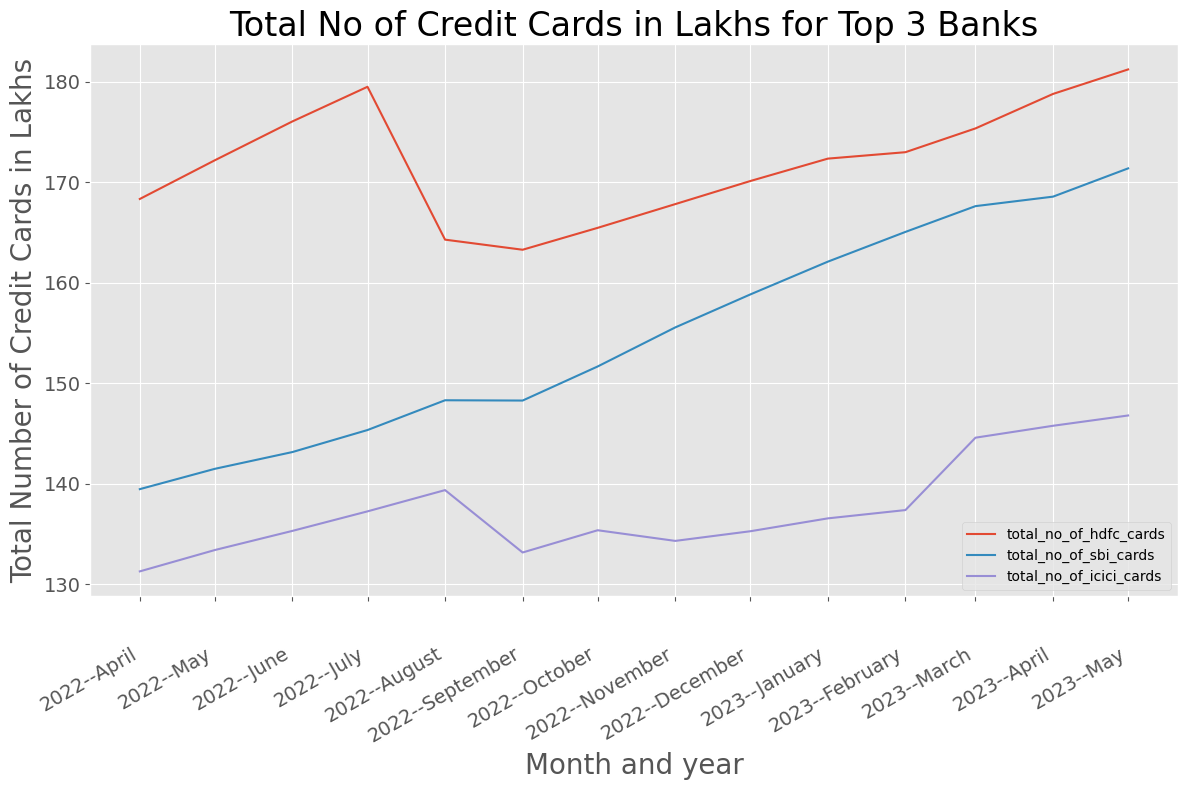

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['total_no_of_hdfc_cards','total_no_of_sbi_cards','total_no_of_icici_cards']]/100000,'-')
legend_df=all_cards[['total_no_of_hdfc_cards','total_no_of_sbi_cards','total_no_of_icici_cards']]
ax.legend(legend_df)

plt.ylabel('Total Number of Credit Cards in Lakhs',fontsize=20)
plt.xlabel('Month and year',fontsize=20)
plt.title('Total No of Credit Cards in Lakhs for Top 3 Banks',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

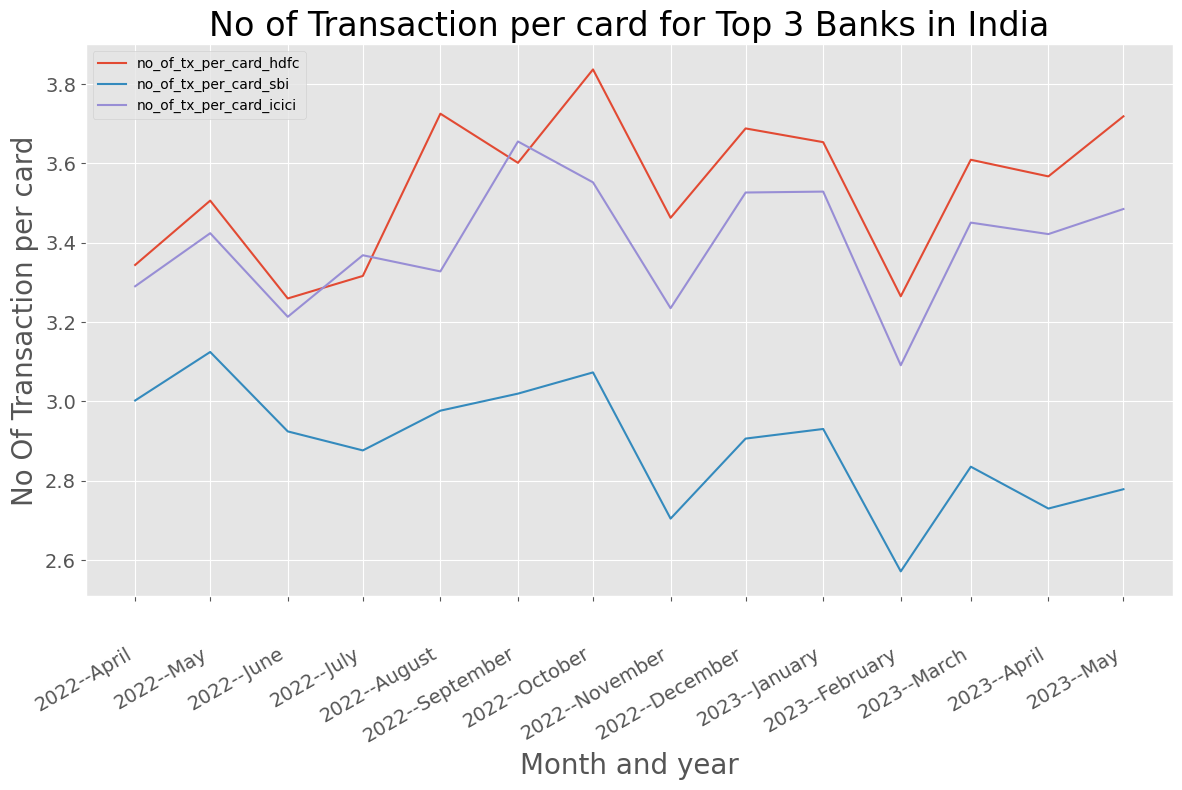

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['no_of_tx_per_card_hdfc','no_of_tx_per_card_sbi','no_of_tx_per_card_icici']],'-')
legend_df=all_cards[['no_of_tx_per_card_hdfc','no_of_tx_per_card_sbi','no_of_tx_per_card_icici']]
ax.legend(legend_df)

plt.ylabel('No Of Transaction per card',fontsize=20)
plt.xlabel('Month and year',fontsize=20)
plt.title('No of Transaction per card for Top 3 Banks in India',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

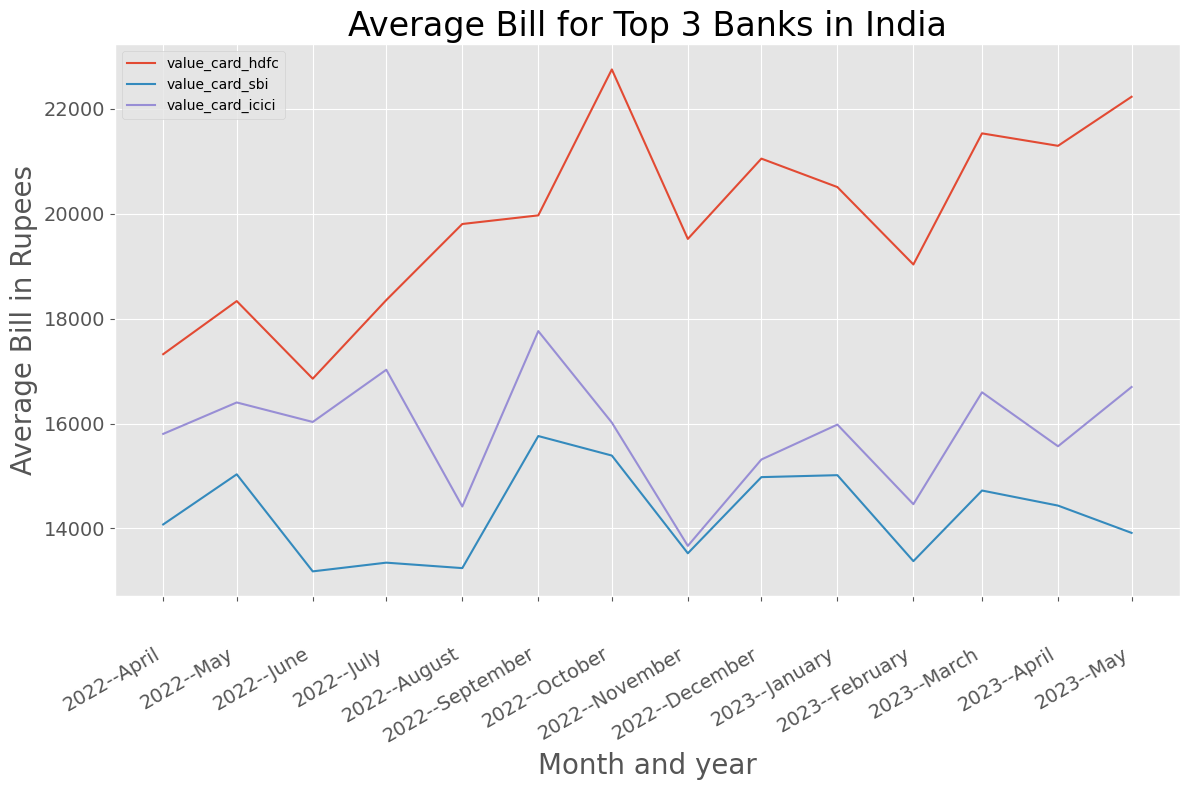

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['value_card_hdfc','value_card_sbi','value_card_icici']],'-')
ax.legend(all_cards[['value_card_hdfc','value_card_sbi','value_card_icici']])

plt.ylabel('Average Bill in Rupees',fontsize=20)
plt.xlabel('Month and year',fontsize=20)
plt.title('Average Bill for Top 3 Banks in India',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

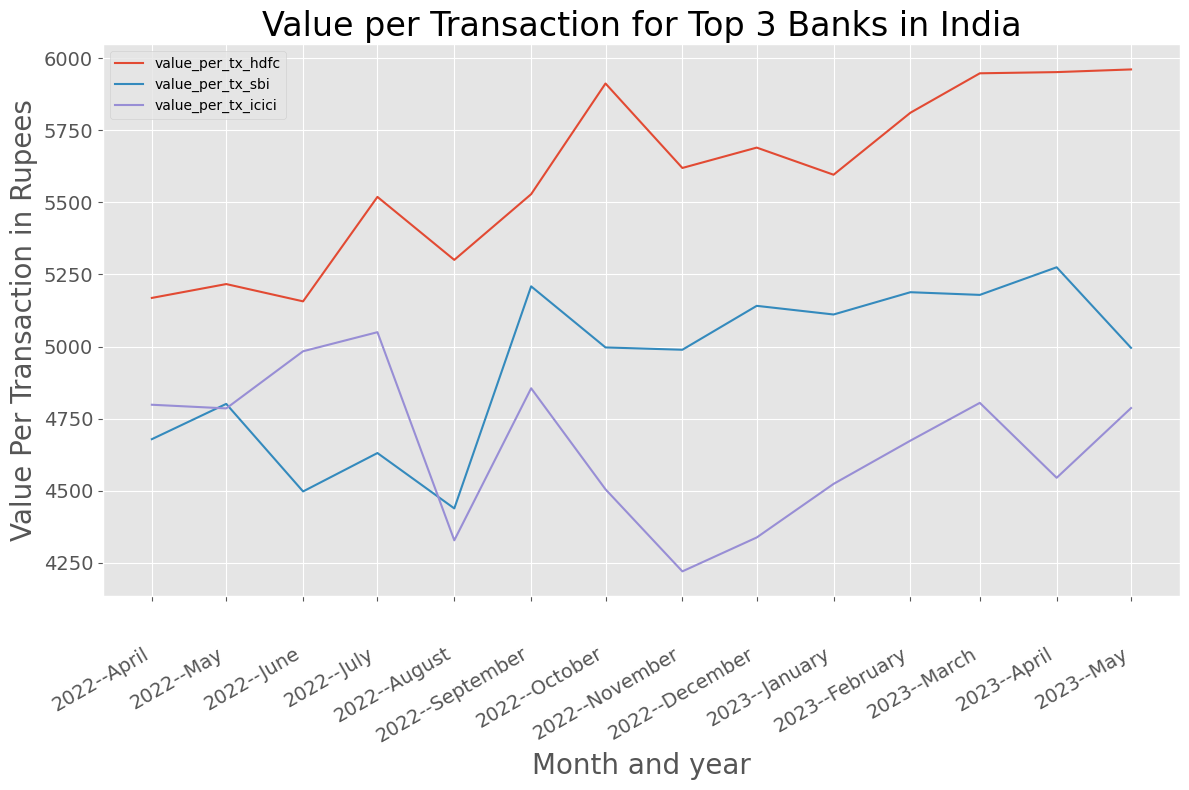

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['value_per_tx_hdfc','value_per_tx_sbi','value_per_tx_icici']],'-')
ax.legend(all_cards[['value_per_tx_hdfc','value_per_tx_sbi','value_per_tx_icici']])

plt.ylabel('Value Per Transaction in Rupees',fontsize=20)
plt.xlabel('Month and year',fontsize=20)
plt.title('Value per Transaction for Top 3 Banks in India',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

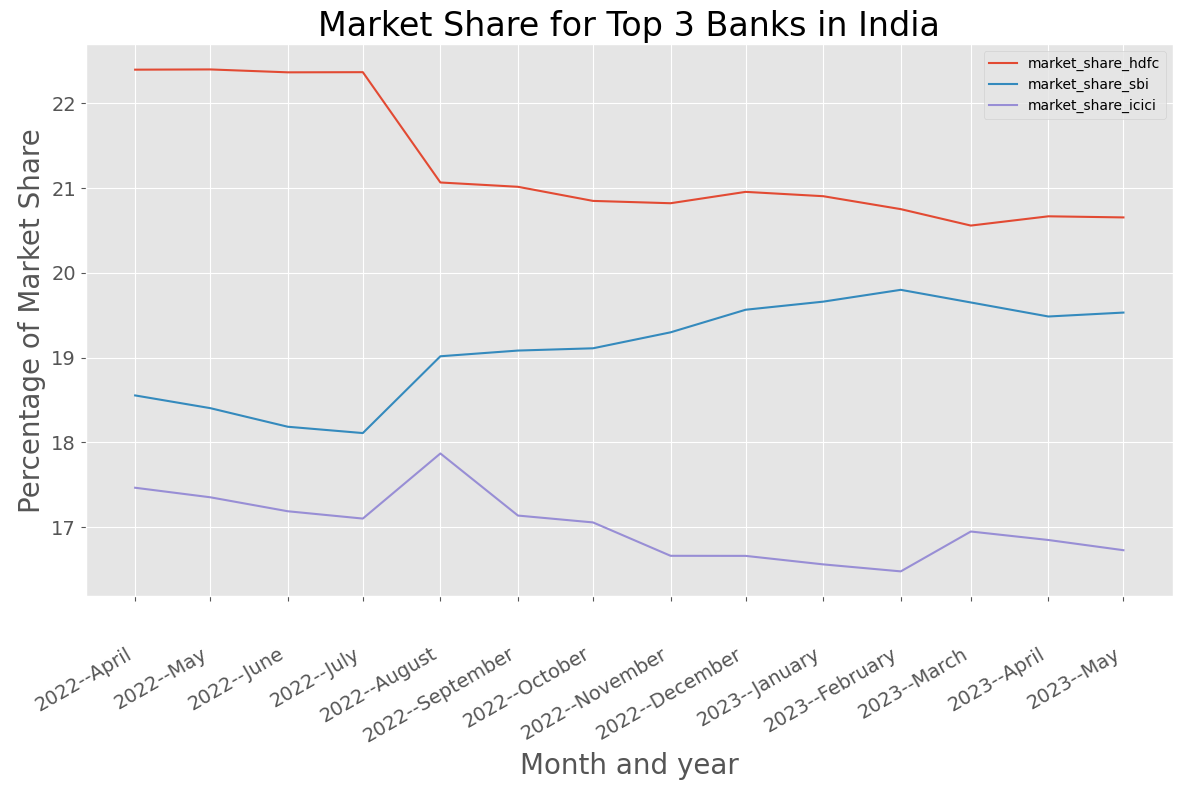

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['market_share_hdfc','market_share_sbi','market_share_icici']],'-')
ax.legend(all_cards[['market_share_hdfc','market_share_sbi','market_share_icici']])

plt.ylabel('Percentage of Market Share',fontsize=20)
plt.xlabel('Month and year',fontsize=20)
plt.title('Market Share for Top 3 Banks in India',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

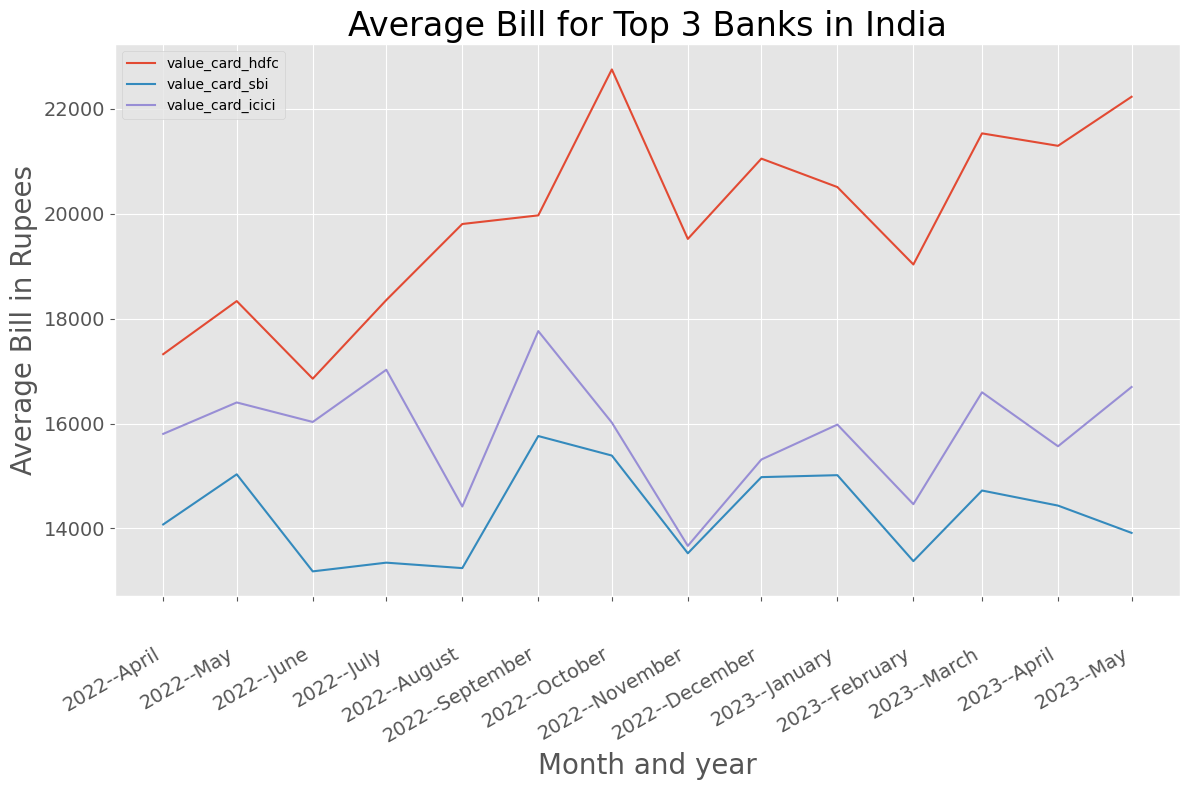

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['value_card_hdfc','value_card_sbi','value_card_icici']],'-')
ax.legend(all_cards[['value_card_hdfc','value_card_sbi','value_card_icici']])

plt.ylabel('Average Bill in Rupees',fontsize=20)
plt.xlabel('Month and year',fontsize=20)
plt.title('Average Bill for Top 3 Banks in India',fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()

### appendix here

Text(0.5, 1.0, 'Market Share of Top 3 Cards')

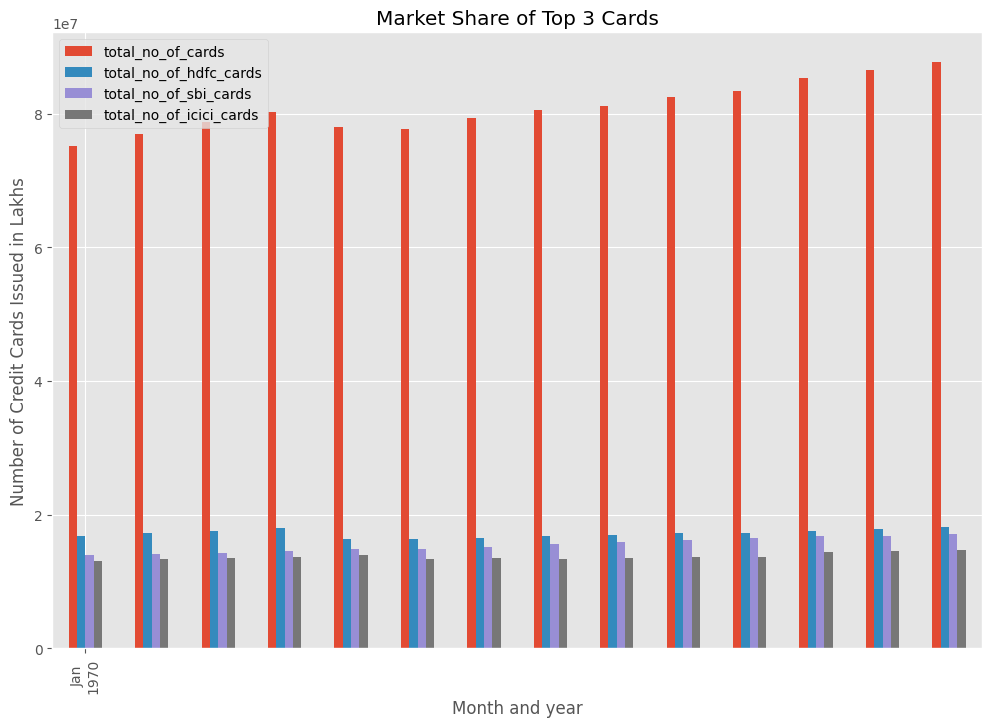

In [ ]:
ax=all_cards[['total_no_of_cards','total_no_of_hdfc_cards','total_no_of_sbi_cards','total_no_of_icici_cards']].plot(figsize=(12,8),kind='bar')

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

plt.ylabel('Number of Credit Cards Issued in Lakhs')
plt.xlabel('Month and year')
plt.title('Market Share of Top 3 Cards')


Text(0.5, 1.0, 'Total No of Cards in Lakhs')

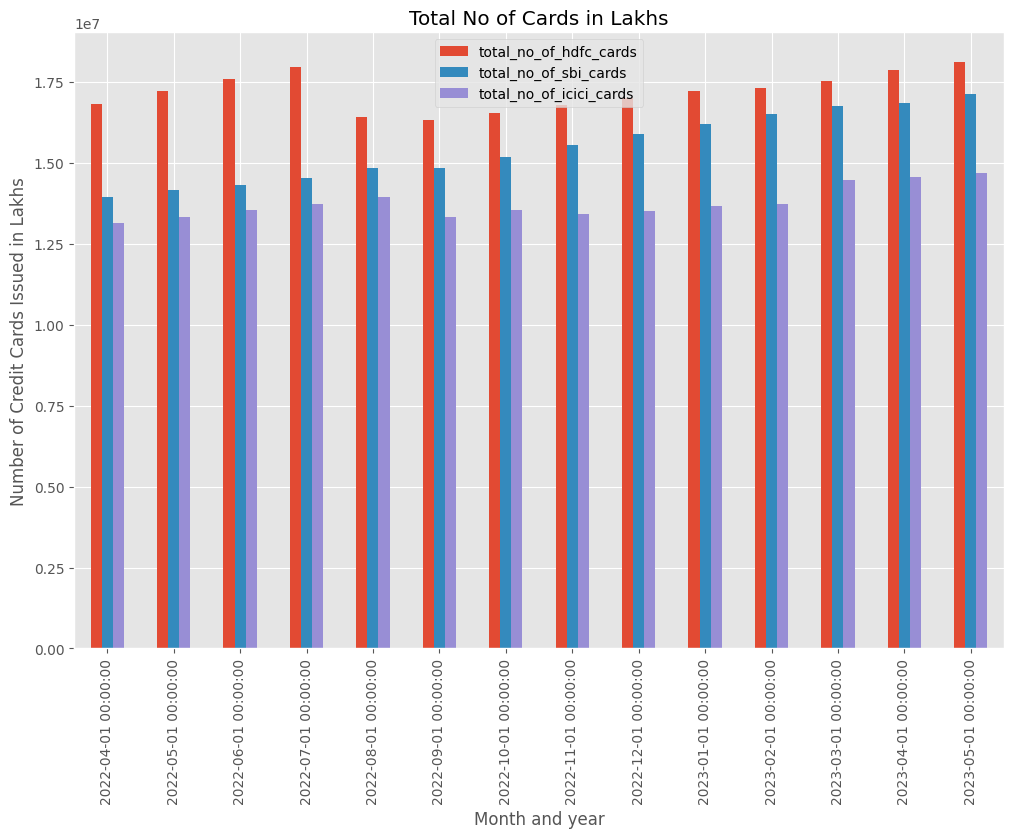

In [ ]:
all_cards[['total_no_of_hdfc_cards','total_no_of_sbi_cards','total_no_of_icici_cards']].plot(figsize=(12,8),kind='bar')
plt.ylabel('Number of Credit Cards Issued in Lakhs')
plt.xlabel('Month and year')
plt.title('Total No of Cards in Lakhs')

Text(0.5, 1.0, 'Market Share of Top Three Cards in India')

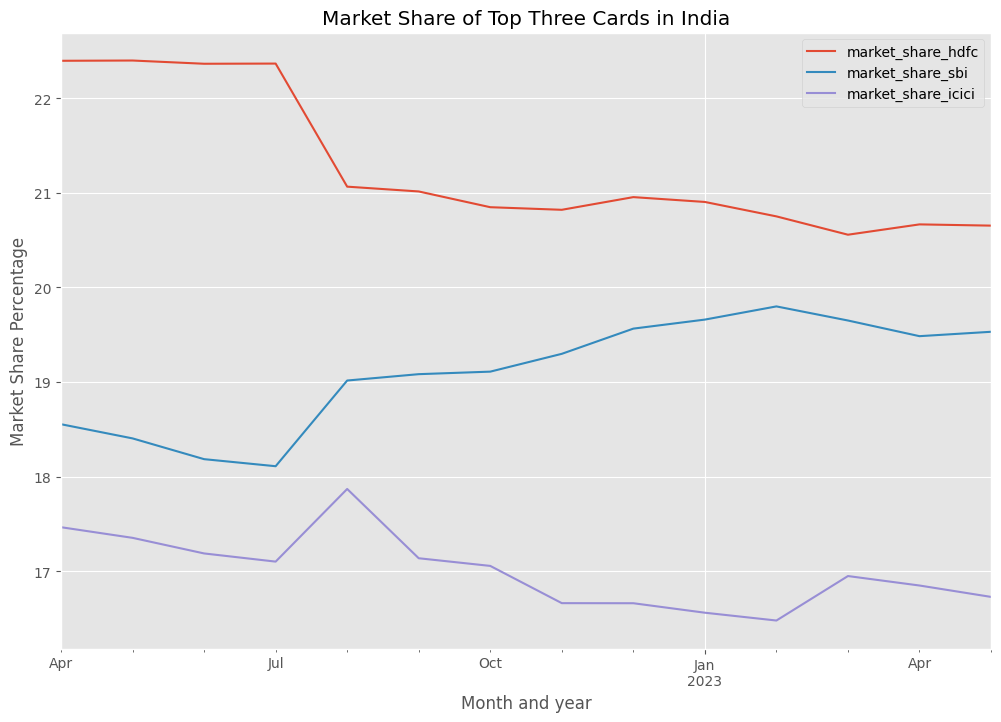

In [ ]:
all_cards[['market_share_hdfc','market_share_sbi','market_share_icici']].plot(figsize=(12,8))
plt.ylabel('Market Share Percentage')
plt.xlabel('Month and year')
plt.title('Market Share of Top Three Cards in India')

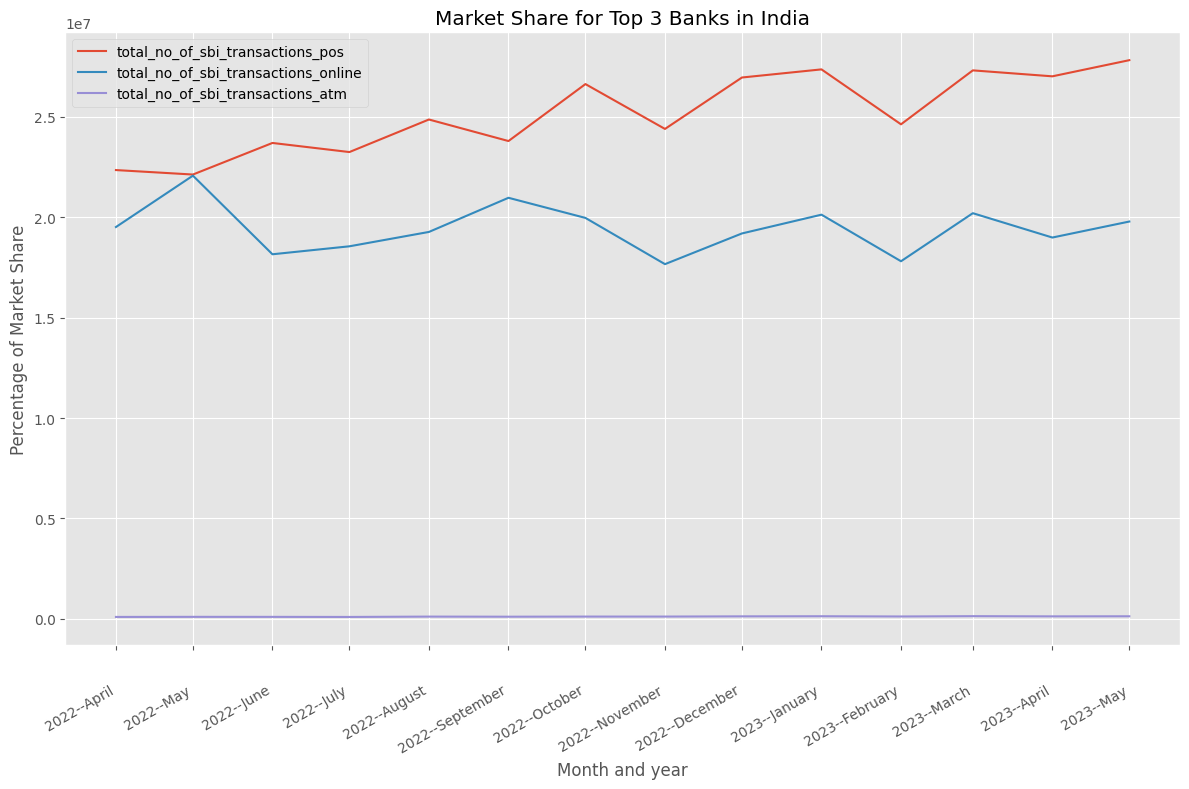

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot_date(all_cards.index,all_cards[['total_no_of_sbi_transactions_pos','total_no_of_sbi_transactions_online','total_no_of_sbi_transactions_atm']],'-')
ax.legend(all_cards[['total_no_of_sbi_transactions_pos','total_no_of_sbi_transactions_online','total_no_of_sbi_transactions_atm']])

plt.ylabel('Percentage of Market Share')
plt.xlabel('Month and year')
plt.title('Market Share for Top 3 Banks in India')

# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()
plt.show()